## Exploration Data Analysis (EDA) for Video Games Sales

In [1]:
# library manipulation dataset
import numpy as np
import pandas as pd

# library visualization data
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Load Dataset

In [2]:
# load dataset
dataset = pd.read_csv("dataset/vgsales.csv")

# convert columns year to datetime
dataset["Year"] = pd.to_datetime(dataset["Year"], format="%Y")

# display dataset
dataset.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16282,Woody Woodpecker in Crazy Castle 5,GBA,2002-01-01,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16283,Men in Black II: Alien Escape,GC,2003-01-01,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16284,SCORE International Baja 1000: The Official Game,PS2,2008-01-01,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16285,Know How 2,DS,2010-01-01,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16286,Spirits & Spells,GBA,2003-01-01,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


### Exploration Data Analysis

In [3]:
def total_sales(dataset):

  # process aggregation
  df = dataset[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].aggregate("sum").reset_index()
  
  # rename columns
  df.columns = ["Region", "Sales"]

  # sorting values
  df = df.sort_values(by=["Sales"], ascending=False)

  # return values
  return df


In [4]:
# results of total sales
df_sales = total_sales(dataset)

In [5]:
def grouping_sales(columns, dataset):

  # process grouping
  df = dataset.groupby(columns)[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].aggregate("sum").reset_index()

  # sorting values
  df = df.sort_values(by=["Global_Sales"], ascending=False)

  # return values
  return df

In [6]:
# grouping by platform
df_platform = grouping_sales("Platform", dataset)
df_platform = df_platform.head(3)

# grouping by publisher
df_publisher = grouping_sales("Publisher", dataset)
df_publisher = df_publisher.head(3)

# grouping by genre
df_genre = grouping_sales("Genre", dataset)
df_genre = df_genre.head(3)

# grouping by name
df_name = grouping_sales("Name", dataset)
df_name = df_name.head(3)

In [7]:
# ....
def barplot(dataset, x, y, hue, title):

  # create figure
  fig, ax = plt.subplots(figsize=(8,4))

  # create barplot
  sns.barplot(data=dataset, x=x, y=y, hue=hue)

  # set labels
  ax.set_title(title)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.grid(True)

  # display plot
  plt.show()

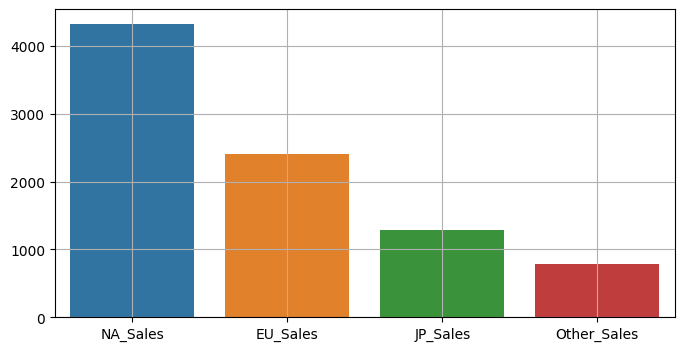

In [8]:
# call func barplot
barplot(dataset=df_sales, x="Region", y="Sales", hue="Region", title="")

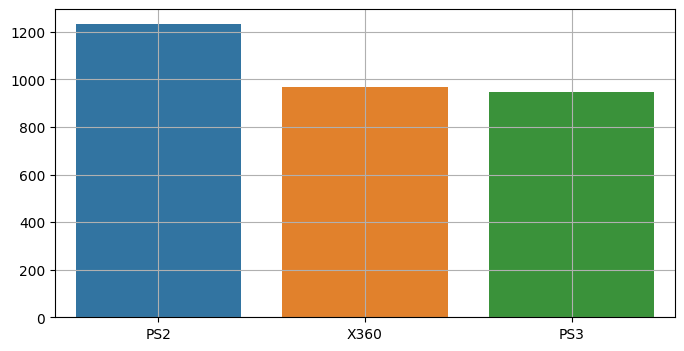

In [9]:
# call func barplot
barplot(dataset=df_platform, x="Platform", y="Global_Sales", hue="Platform", title="")

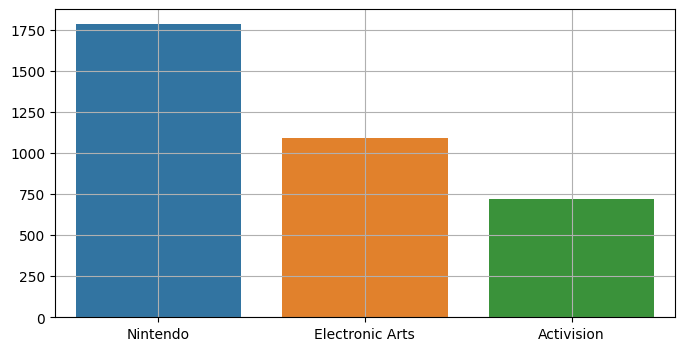

In [10]:
# call func barplot
barplot(dataset=df_publisher, x="Publisher", y="Global_Sales", hue="Publisher", title="")

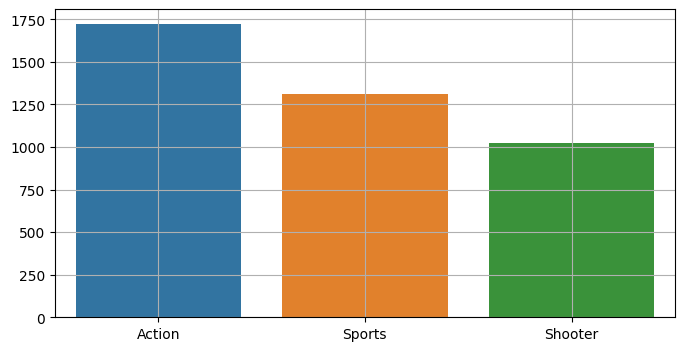

In [11]:
# call func barplot
barplot(dataset=df_genre, x="Genre", y="Global_Sales", hue="Genre", title="")

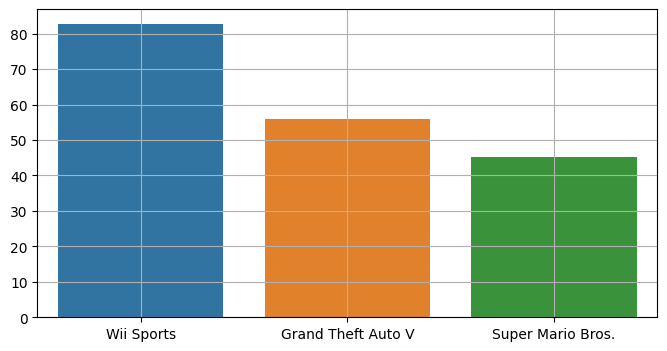

In [12]:
# call func barplot
barplot(dataset=df_name, x="Name", y="Global_Sales", hue="Name", title="")

In [13]:
# ...
def unpivot_sales(columns, dataset):

  # process unpivot
  df = pd.melt(
    frame=dataset, id_vars=[columns], var_name='Region', value_name='Sales',
    value_vars=['NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales']
  )
  # return values
  return df

In [14]:
# grouping by platform
df_platform = unpivot_sales("Platform", df_platform)

# grouping by publisher
df_publisher = unpivot_sales("Publisher", df_publisher)

# grouping by genre
df_genre = unpivot_sales("Genre", df_genre)

# grouping by name
df_name = unpivot_sales("Name", df_name)

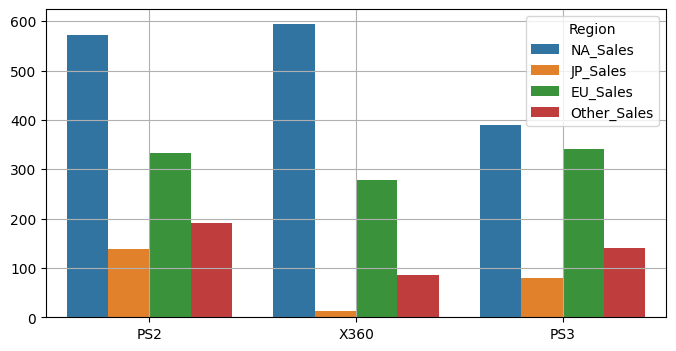

In [15]:
# call func barplot
barplot(dataset=df_platform, x="Platform", y="Sales", hue="Region", title="")

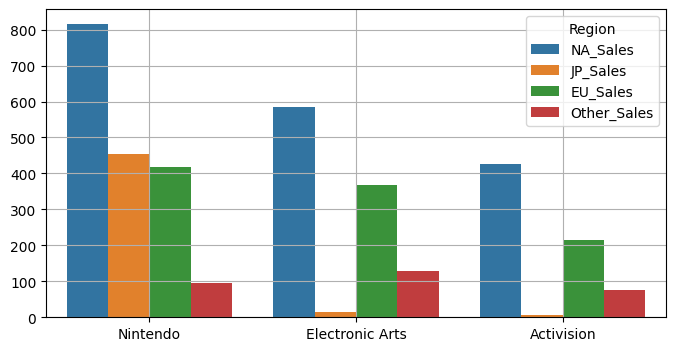

In [16]:
# call func barplot
barplot(dataset=df_publisher, x="Publisher", y="Sales", hue="Region", title="")

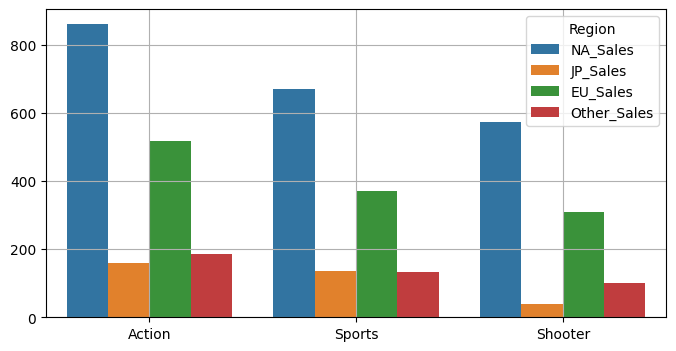

In [17]:
# call func barplot
barplot(dataset=df_genre, x="Genre", y="Sales", hue="Region", title="")

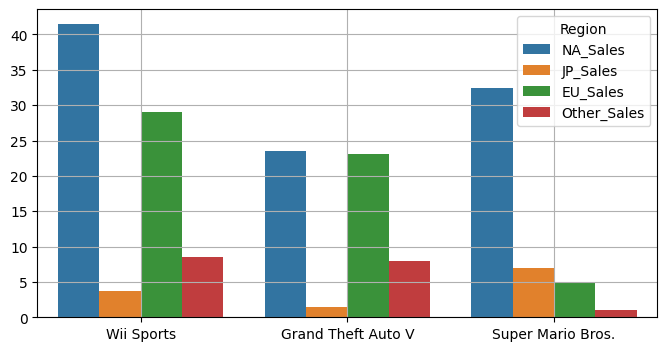

In [18]:
# call func barplot
barplot(dataset=df_name, x="Name", y="Sales", hue="Region", title="")